# Chapter 3. 파이썬을 이용한 데이터 분석

## 3.6 정규분포와 응용

### 3.6.1. 라이브러리 임포트

In [1]:
# 수치 계산에 사용할 라이브러리 임포트
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
%matplotlib inline

### 3.6.2. 확률밀도

In [3]:
# 원주율
sp.pi

3.142

In [4]:
# 지수함수 : e의 1승
np.exp(1)

2.718281828459045

In [5]:
# "평균 4 분산 0.64 (표준 편차 0.8)의 정규 분포"의 확률 변수가 3 일 때의 확률 밀도
x = 3
mu = 4
sigma = 0.8

1 / (np.sqrt(2 * sp.pi * sigma**2)) * \
    np.exp(- ((x - mu)**2) / (2 * sigma**2))

0.22831135673627742

In [6]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

In [8]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.2283113567362774

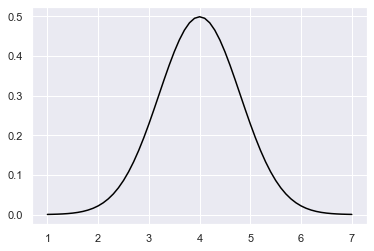

In [9]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot, 
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

### 3.6.3. 표본이 어떤 값 이하가 되는 비율

In [10]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [11]:
# 3 이하인 데이터의 개수
np.sum(simulated_sample <= 3)

10371

In [12]:
# 3이하인 데이터의 비율 : 10.4%
np.sum(simulated_sample <= 3) / len(simulated_sample)

0.10371

### 3.6.4. 누적분포함수(cdf)

    확률변수 X에 대해 x가 실수라고 했을 때, 누적분포함수
        F(X) = P(X ≤ x)
        
    stats.norm.cdf 함수 사용(Cumulative Distribution Function)

In [13]:
# 모집단 분포가 평균 4, 표준편차가 0.8일 때, 확률변수가 3이하가 될 확률
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.10564977366685535

In [14]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.5

### 3.6.5. 하측확률과 퍼센트포인트(ppf)

* 하측확률: 데이터가 어떤 값 이하가 될 확률, 누적분포함수를 사용해서 구함
* 퍼센트포인트: 어떤 확률이 될 기준치
    - stats.norm.ppf 함수 이용(Percent Point Function)

In [13]:
# 모집단 분포가 평균 4, 표준편차가 0.8일 때, 하측확률이 2.5%가 되는 퍼센트 포인트
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.4320288123679563

In [14]:
lower = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = lower)

3.0000000000000004

In [15]:
#하측확률이 50%가 되는 퍼센트포인트는 평균과 일치
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

### 3.6.8. t 값의 표본분포

* t값
    - (표본평균 - 모평균) / 표준오차
    - 표본평균에 대한 표준화
    
    

* (참고)표준화
    - 평균을 0, 분산을 1로 하는 변환
    - (데이터-평균)/표준편차

In [15]:
# 난수 시드 설정
np.random.seed(1)
# t값을 저장할 변수 설정
t_value_array = np.zeros(10000)
# 정규분포 클래스의 인스턴스
norm_dist = stats.norm(loc = 4, scale = 0.8)
# 시뮬레이션 실행
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

c:\users\unf\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


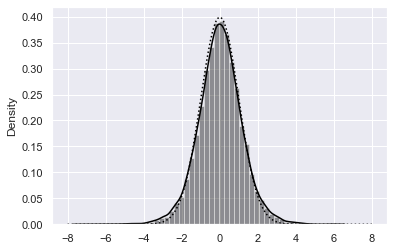

In [20]:
# t값의 히스토그램
sns.distplot(t_value_array, color = 'black')

# 표본정규분포의 확률밀도
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')

### 3.6.9. t 분포

* 두집단의 평균이 동일한지 알고자 할 때 검정통계량으로 활용된다.

모집단분포가 정규분포일 때 t값의 표본분포

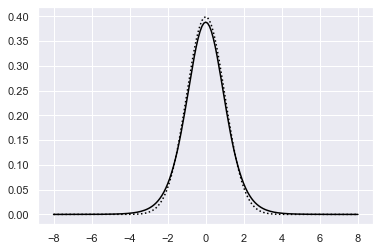

In [31]:
# t분포의 확률밀도와 표준정규분포의 확률밀도
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), color = 'black')

In [28]:
?stats.t.pdf

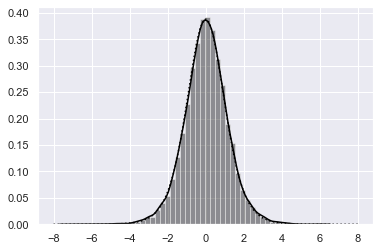

In [19]:
sns.distplot(t_value_array, 
             color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black', linestyle = 'dotted')

#### t분포의 의미
- 모분산을 모르는 상황에서도 표본평균의 분포에 대해 얘기할 수 있음
- 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다  
    → 얻어낸 표본평균에 대한 불확실성을 짐작할 수 있음(추정에 활용)